In [1]:
#Data Description

#1.  Age | Objective Feature | age | int (days)
#2.  Height | Objective Feature | height | int (cm) |
#3.  Weight | Objective Feature | weight | float (kg) |
#4.  Gender | Objective Feature | gender | categorical code | 1:woman 2: man
#5.  Systolic blood pressure | Examination Feature | ap_hi | int |
#6.  Diastolic blood pressure | Examination Feature | ap_lo | int |
#7.  Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#8.  Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#9.  Smoking | Subjective Feature | smoke | binary |
#10. Alcohol intake | Subjective Feature | alco | binary |
#11. Physical activity | Subjective Feature | active | binary | 
#12. Presence or absence of cardiovascular disease | Target Variable | cardio | 1: disease 0: no|





#!pip install seaborn 

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data

n = None
df = pd.read_csv('C:/Users/chgbessa/Documents/python/machine_learning/Robson_Serafim/cardio_train.csv',
                 delimiter = ';', nrows = n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Data Dimension

print("Number of rows: {}".format(df.shape[0]))
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 70000
Number of columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
#Preparing Data

#Lets convert days to age in the column age

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [6]:
#Drop the ID column

df = df.drop('id', axis = 1)

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def remove_outlier(col):
    Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    print("Old shape: ", df.shape)
    
    upper = np.where(df[col] >= (Q3 + 1.5*IQR))
    lower = np.where(df[col] <= (Q1 - 1.5*IQR))
    
    #Remove outliers
    
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    
    print('New shape: ', df.shape)

In [9]:
remove_outlier('height')

Old shape:  (70000, 12)
New shape:  (69481, 12)


C:\Users\chgbessa\AppData\Local\Temp\ipykernel_4888\155879233.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  remove_outlier('height')


In [10]:
#Analysing the variables 'ap_hi' e 'ap_lo'

print("Systolic pressure is greater than diastolic pressure in {0} cases".format(df[df['ap_lo'] > df['ap_hi']].shape[0]))

Systolic pressure is greater than diastolic pressure in 1221 cases


In [11]:
#Using another method to treat systolic and diastolic pressure outliers

#1. Diastolic and systolic pressure cannot be negative

#2. Diastolic pressure cannot be greater than systolic pressure

#Like this:

df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index, inplace = True)

df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index, inplace = True)

print("Systolic pressure is greater than diastolic pressure in {0} cases".format(df[df['ap_lo'] > df['ap_hi']].shape[0]))

Systolic pressure is greater than diastolic pressure in 0 cases


In [12]:
display(df.describe())
display(df.shape)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(65708, 12)

In [13]:
#df['IMC'] = df['weight']/((df['height']/100)**2)
#df.head()

In [14]:
#ExploratoryAnalysis

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.00000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000,65708.000000
mean,52.860489,1.348633,164.465940,74.043265,126.245313,81.18430,1.361204,1.224113,0.087250,0.052809,0.803905,0.492725
std,6.759225,0.476541,7.580947,14.029845,14.457192,8.39941,0.677379,0.570927,0.282203,0.223654,0.397044,0.499951
min,29.000000,1.000000,143.000000,11.000000,100.000000,60.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,186.000000,200.000000,170.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Checking the distribution of the 'cardio' variable in the dataset:
# Get a count of the number of individuals with cardio

display(df['cardio'].value_counts())
display(print("\n Patients with heart disease represent {:.2f}% of the dataset.\n".format(
    (df[df.cardio == 1].shape[0]/df.shape[0])*100)));

cardio
0    33332
1    32376
Name: count, dtype: int64


 Patients with heart disease represent 49.27% of the dataset.



None

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65708 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          65708 non-null  int64  
 1   gender       65708 non-null  int64  
 2   height       65708 non-null  int64  
 3   weight       65708 non-null  float64
 4   ap_hi        65708 non-null  int64  
 5   ap_lo        65708 non-null  int64  
 6   cholesterol  65708 non-null  int64  
 7   gluc         65708 non-null  int64  
 8   smoke        65708 non-null  int64  
 9   alco         65708 non-null  int64  
 10  active       65708 non-null  int64  
 11  cardio       65708 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.5 MB


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

print('The minimum value is {} and the maximum value is {}'.format(df.min(), df.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [18]:
from sklearn.model_selection import train_test_split

X = df[:, 0:10]
y = df[:, 11]

#train_input, test_input, train_labels, test_labels = train_test_split(
#input_data, labels, test_size = 0.2)



# Select features
#cols_to_use = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
 #             'active', 'IMC']
#X = df[cols_to_use]

# Select target
#y = df.cardio

# Separate data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Teste Data: {X_test.shape}, {y_test.shape}")




#print('We have {} training and {} testing rows'.format(X_train.shape[0], X_test.shape[0]))
#print('There are {} input columns'.format(y_train.shape[1]))

Train Data: (45995, 10), (45995,)
Teste Data: (19713, 10), (19713,)


In [19]:
print('We have {} training and {} testing rows'.format(X_train.shape[0], X_test.shape[0]))
print('There are {} input columns'.format(X_train.shape[1]))

We have 45995 training and 19713 testing rows
There are 10 input columns


In [20]:
with open('C:/Users/chgbessa/Documents/python/machine_learning/My_projects_QML/train.npy', 'wb') as f:
    np.save(f, X_train)
    np.save(f, y_train)

with open('C:/Users/chgbessa/Documents/python/machine_learning/My_projects_QML/test.npy', 'wb') as f:
    np.save(f, X_test)
    np.save(f, y_test)

In [21]:
import random

random.seed(a=None, version=2)

def classify(patient):
    return random.randint(0, 1)

In [22]:
def run(f_classify, x):
    return list(map(f_classify, x))

In [23]:
result = run(classify, X_train)


In [24]:
print(result)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 

In [25]:
def evaluate(predictions, actual):
    correct = list(filter(lambda item: item[0] == item[1],list(zip(predictions,actual))))

    return '{} correct predictions out of {}. Accuracy {:.0f} %'.format(len(correct),
                                                                        len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, X_train), y_train))

22975 correct predictions out of 45995. Accuracy 50 %


In [26]:
def predict_cardio(item):
    return 1

print(evaluate(run(predict_cardio, X_train), y_train))

22747 correct predictions out of 45995. Accuracy 49 %


In [27]:
from sklearn.metrics import confusion_matrix

predictions = run(predict_cardio, X_train)
confusion_matrix(y_train, predictions)

array([[    0, 23248],
       [    0, 22747]])

In [28]:
from sklearn.metrics import precision_score

print('The precision score of the predict_cardio classifier is {}'.format(precision_score(y_train, predictions)))


The precision score of the predict_cardio classifier is 0.4945537558430264


In [29]:
from sklearn.metrics import recall_score

print('The recall score of the predict_cardio classifier is {}'.format(recall_score(y_train, predictions)))


The recall score of the predict_cardio classifier is 1.0


In [30]:
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0


def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(y_train, predictions)

print('The specificity score of the predict_cardio classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_cardio classifier is {:.2f}'.format(npv(cm)))

The specificity score of the predict_cardio classifier is 0.00
The npv score of the predict_cardio classifier is 0.00


In [31]:
random_predictions = run(classify, X_train)
random_cm = confusion_matrix(y_train, random_predictions)

print('The precision score of the random classifier is {:.2f}'.format(precision_score(y_train, random_predictions)))
print('The recall score of the random classifier is {:.2f}'.format(recall_score(y_train, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'.format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'.format(npv(random_cm)))

The precision score of the random classifier is 0.49
The recall score of the random classifier is 0.50
The specificity score of the random classifier is 0.49
The npv score of the random classifier is 0.50


In [32]:
def hypocrite(patient, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

In [33]:
w_predictions = run(lambda patient: hypocrite(patient, -0.5), X_train)
w_cm = confusion_matrix(y_train, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'.format(precision_score(y_train, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'.format(recall_score(y_train, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'.format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'.format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.50
The recall score of the hypocrite classifier is 0.25
The specificity score of the hypocrite classifier is 0.75
The npv score of the hypocrite classifier is 0.51


In [34]:
# number of steps to consider between −1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [−1, −0.95, ... 0.9, 0.95, 1.0]
weights = list(map(lambda weight: round(weight, 2),np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()))

# list of predictions at every step
l_predictions = list(map(lambda step: run(lambda patient: hypocrite(patient, weights[step]),X_train),steps))

# list of confusion matrices at every step
l_cm = list(map(lambda step: confusion_matrix(y_train, l_predictions[step]),steps))


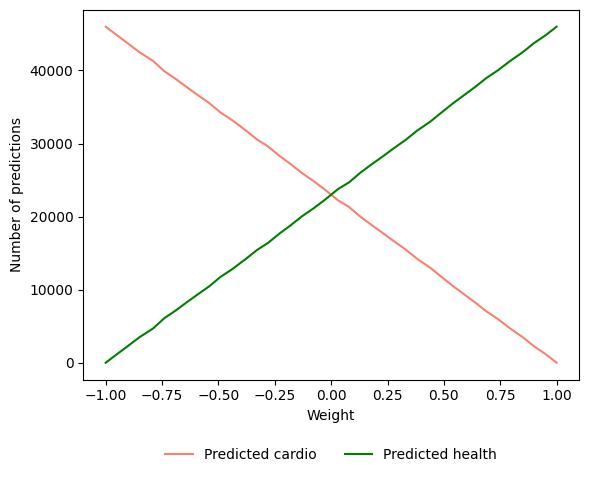

In [35]:
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
cardio, = plt.plot(weights, list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),'salmon', # color graph 
                   label='Predicted cardio')

# create a graph for the number of predicted survivals
health, = plt.plot(weights, list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)), 'green', # color graph
label='Predicted health')

plt.legend(handles=[cardio, health],loc='upper center', bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [36]:
l_precision = list(map(lambda step: precision_score(y_train, l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(y_train, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))


C:\Users\chgbessa\.conda\envs\qiskit\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


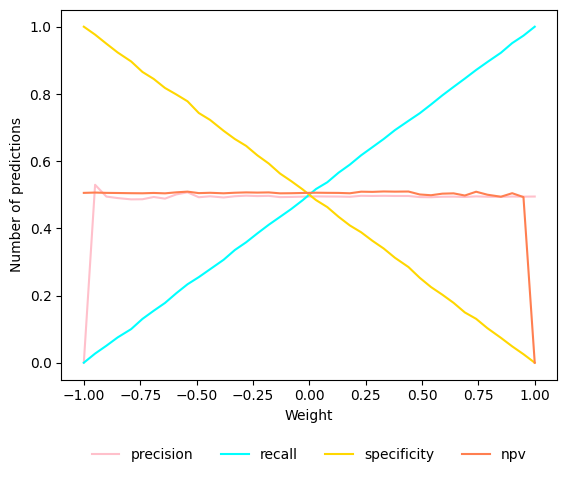

In [37]:
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(handles=[m_precision, m_recall, m_specificity, m_npv],loc='upper center',bbox_to_anchor=(0.5, -0.15), 
           framealpha=0.0,ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

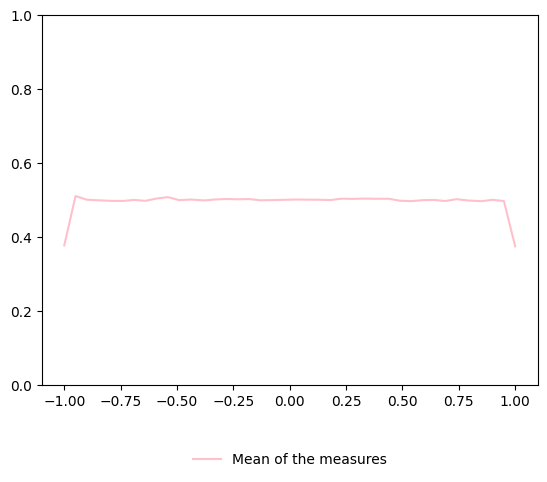

In [38]:
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [39]:
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
    print('The information level is: {:.2f}'.format(cr_level))

In [40]:
classifier_report("Random PQC",run, classify, X_train, y_train)

The precision score of the Random PQC classifier is 0.50
The recall score of the Random PQC classifier is 0.50
The specificity score of the Random PQC classifier is 0.50
The npv score of the Random PQC classifier is 0.51
The information level is: 0.50


----------------------------------------------------

############  Quantum Computing #############

-------------------------------------------------------

In [41]:
#The parameterized quantum circuit classifier

#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
#from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution
from math import sqrt


In [42]:
def pqc_classify(backend_aer, patient_state):
    """backend -- a qiskit backend to run the quantum circuit at passenger_state -- a valid quantum state vector"""
    
    #create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    #Define state |psi> and initialize the circuit
    qc.initialize(patient_state, 0)
    
    #Measure the qubit
    qc.measure_all()
    
    #run the quantum circuit
    job_aer = sampler_aer.run([(qc, None, 1)]) # running the circuit 1 time

    result = job_aer.result() #Getting the results   

    #counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
    
    #result = execute(qc, backend_aer).result()
    
    #get the counts, there are {'0': 1} or {'1': 1}
    #counts = result.get_counts(qc)
    counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
    
    #get the bit 0 or 1
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [43]:
#The scores of the random quantum classifier

#Tell Qiskit how to simulate our circuit

#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


#backend = Aer.get_backend('statevector_simulator')

#Specify the quantum states that results in both 0 or 1

initial_state = [1/sqrt(2), 1/sqrt(2)]

classifier_report("Random_PQC", run, lambda patient: pqc_classify(backend_aer, initial_state), X_train, y_train)

The precision score of the Random_PQC classifier is 0.49
The recall score of the Random_PQC classifier is 0.50
The specificity score of the Random_PQC classifier is 0.50
The npv score of the Random_PQC classifier is 0.50
The information level is: 0.50


In [44]:
def pqc_classify(backend_aer, patient_state):
    #...
    
    #get the bit 0 or 1
    
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [45]:
#Pre‐processing template

def pre_process(patient):
    """ patient -- the noemalized (array of numeric data) passenger data returns a valid quantum state"""
    
    quantum_state = [1/sqrt(2), 1/sqrt(2)]
    
    return quantum_state

In [46]:
#The parameterized quantum circuit

def pqc(backend_aer, quantum_state):
    """ backend −− a qiskit backend to run the quantum circuit at quantum_state −− a valid quantum state vector returns 
    the counts of the measurement """

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)
    
    #Define state |psi> and initialize the circuit
    qc.initialize(quantum_state, 0)
    
    #Measure the qubit
    qc.measure_all()
    
    #run the quantum circuit
    #result = execute(qc, backend_aer).result()  #old version

    job_aer = sampler_aer.run([(qc, None, 1)]) # new version -----running the circuit 1 time

    result = job_aer.result() #Getting the results   


    
    #get the counts, these are either {'0': 1} or {'1': 1}
    #counts = result.get_counts(qc)
    counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
    
    return counts
    



In [47]:
def post_process(counts):
    """ counts −− the result of the quantum circuit execution returns the prediction"""
    
    return int(list(map(lambda item: item[0], counts.items()))[0])

In [48]:
#Let’s put it all together.

#The scores of the random quantum classifier

#Tell Qiskit how to simulate our circuit

#backend = Aer.get_backend('statevector_simulator')

classifier_report("Variational", run, lambda patient: post_process(pqc(backend_aer, pre_process(patient))), X_train, y_train)

The precision score of the Variational classifier is 0.49
The recall score of the Variational classifier is 0.50
The specificity score of the Variational classifier is 0.50
The npv score of the Variational classifier is 0.50
The information level is: 0.50


In [49]:
def weigh_feature(feature, weight):
    """ feature −− the single value of a patient's feature
        weight −− the overall weight of this feature returns the weighted feature """
    
    return feature*weight


In [50]:
#evaluate the overall probability

from functools import reduce

In [51]:
def get_overall_probability(features, weights):
    """features -- list of the features of a patient
        weights -- list of all features weights"""
    
    return reduce(lambda result, data: result + weigh_feature(*data), zip(features, weights), 0)

In [52]:
#evaluate the correlation coefficients

from scipy.stats import spearmanr

In [53]:
#Separate the training data into a list of columns

columns = [list(map(lambda patient: patient[i], X_train)) for i in range(0,10)]

#evaluate the correlation coefitient to each column

correlations = list(map(lambda col: spearmanr(col, y_train)[0], columns))

correlations

[np.float64(0.2330141615611734),
 np.float64(0.0010199690416739478),
 np.float64(-0.01625721892557549),
 np.float64(0.17220279881273232),
 np.float64(0.43777475867262666),
 np.float64(0.3385322163494711),
 np.float64(0.21461856277815936),
 np.float64(0.08999868433291393),
 np.float64(-0.014779309466382602),
 np.float64(-0.008886943411844341)]

In [54]:
from math import pi, sin, cos


In [55]:
def get_state(theta):
    """Returns a valid state vector for angle theta"""
    
    return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(patient):
    """Patient --- the normalized (array of numeric data) patient data returns a valid quantum state"""
    
    #Calculate the overall probability
    
    mu = get_overall_probability(patient, correlations)
    
    #theta between 0 (|0>) and pi (|1>)
    
    #quantum_state = get_state((1-mu)*pi)    No caso do titanic ele inverteu o angulo mu pois varias correlacoes 
                                            #    sao negativas
    
    quantum_state = get_state(mu*pi)          #In this case most of the correlations are positive (see box above)
    
    
    
    return quantum_state

In [56]:
#Run the PQC with the weighted pre‐processing

#backend = Aer.get_backend('statevector_simulator')

classifier_report("Variational", run, lambda patient: post_process(pqc(backend_aer, pre_process_weighted(patient))), X_train, 
                  y_train)

The precision score of the Variational classifier is 0.59
The recall score of the Variational classifier is 0.74
The specificity score of the Variational classifier is 0.50
The npv score of the Variational classifier is 0.66
The information level is: 0.62


In [57]:
#Test the PQC‐based classifier on data it has not seen before

classifier_report("Variational-Test", run, lambda patient: post_process(pqc(backend_aer, pre_process_weighted(patient))),
                  X_test, y_test)

The precision score of the Variational-Test classifier is 0.58
The recall score of the Variational-Test classifier is 0.73
The specificity score of the Variational-Test classifier is 0.50
The npv score of the Variational-Test classifier is 0.66
The information level is: 0.62
